In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score



In [5]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')

In [6]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Combining the 2 data frames

In [8]:
df = pd.concat([exercise , calories['Calories']], axis=1)

In [9]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df.shape

(15000, 9)

In [11]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
##categorical column Gender 
df['Gender'].replace({'female':0 , 'male':1},inplace=True)

C:\Users\ritig\AppData\Local\Temp\ipykernel_19548\1003470783.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'female':0 , 'male':1},inplace=True)


In [16]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [21]:
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Analysis

In [18]:
sns.set()

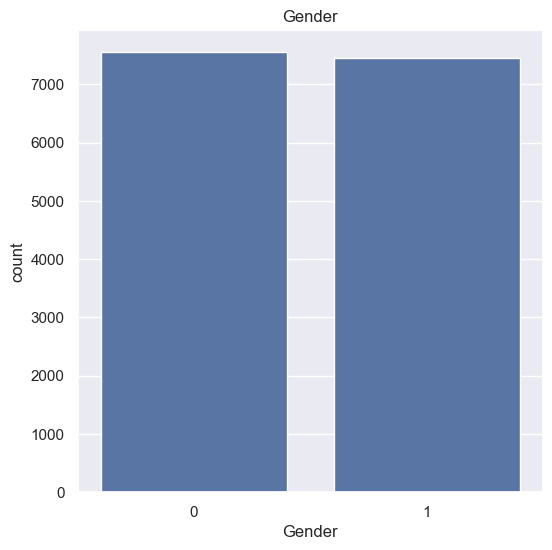

In [20]:
plt.figure(figsize=(6,6))
plt.title('Gender')
sns.countplot(x='Gender',data=df)
plt.show()

In [22]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


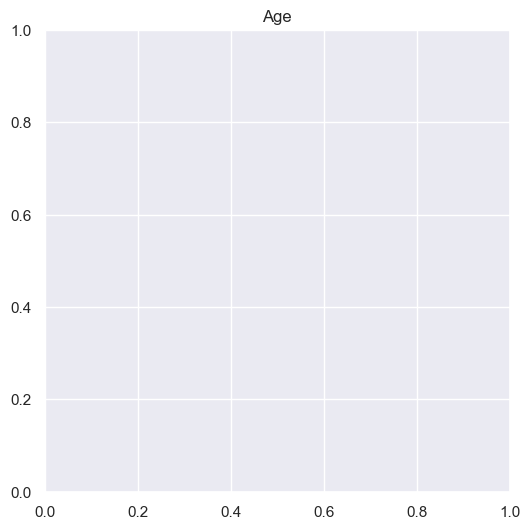

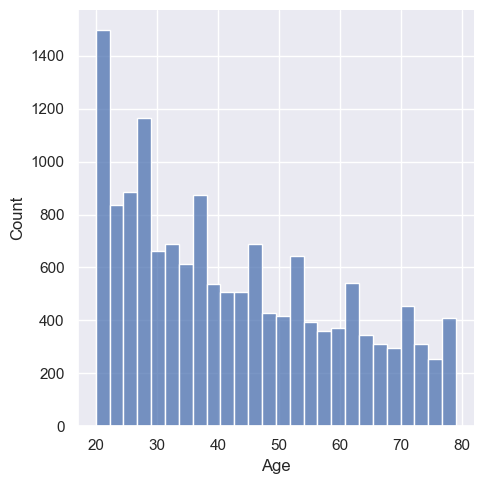

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Age')
sns.displot(df['Age'])
plt.show()

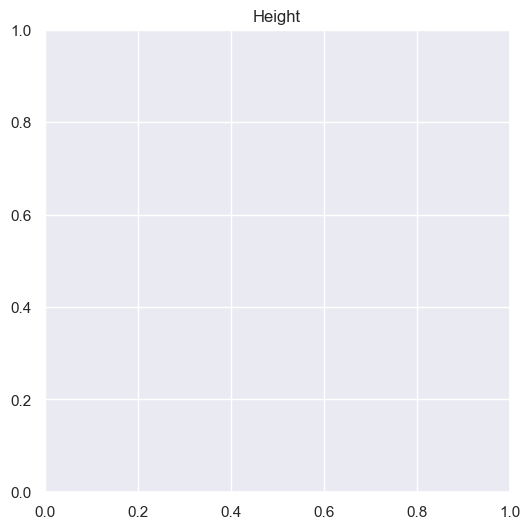

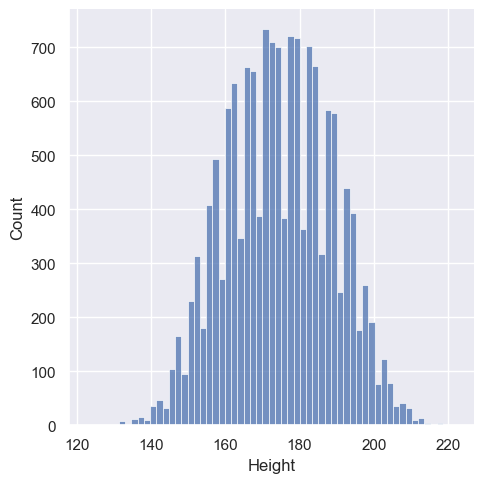

In [26]:
plt.figure(figsize=(6,6))
plt.title('Height')
sns.displot(df['Height'])
plt.show()

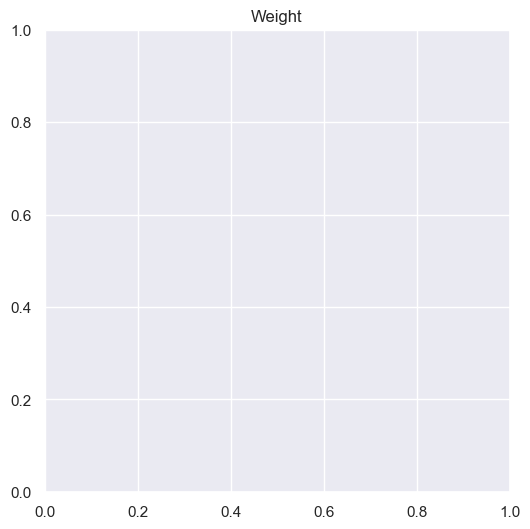

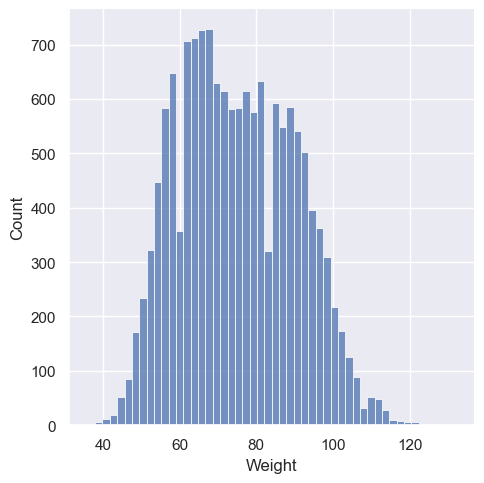

In [27]:
plt.figure(figsize=(6,6))
plt.title('Weight')
sns.displot(df['Weight'])
plt.show()

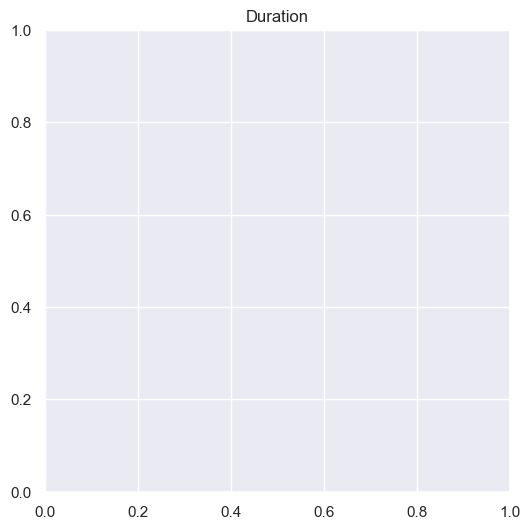

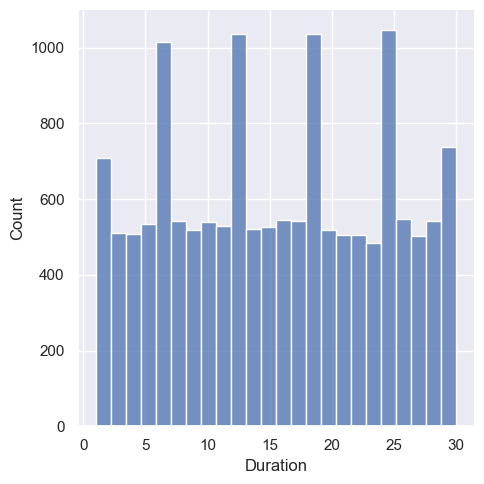

In [28]:
plt.figure(figsize=(6,6))
plt.title('Duration')
sns.displot(df['Duration'])
plt.show()

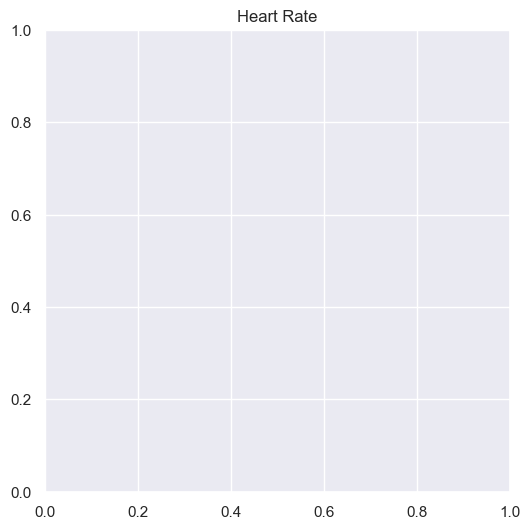

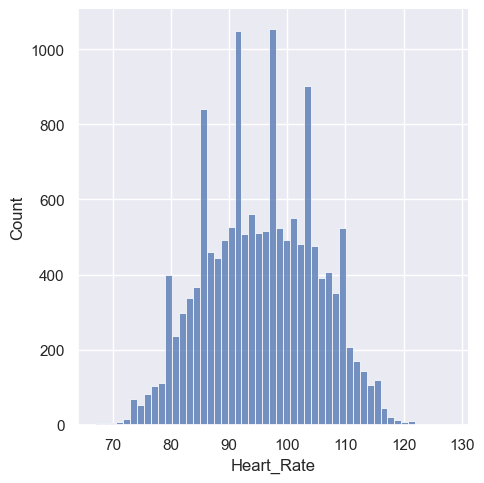

In [30]:
plt.figure(figsize=(6,6))
plt.title('Heart Rate')
sns.displot(df['Heart_Rate'])
plt.show()

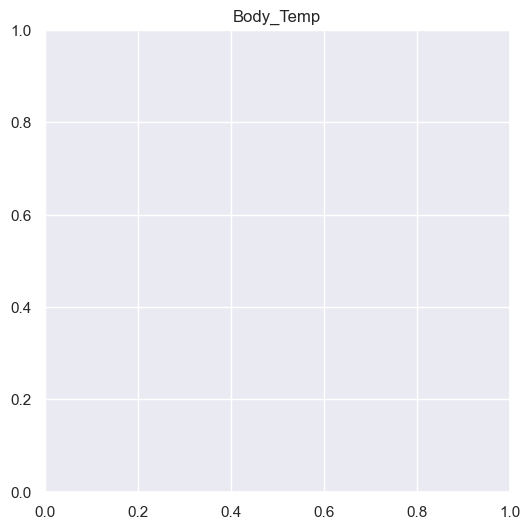

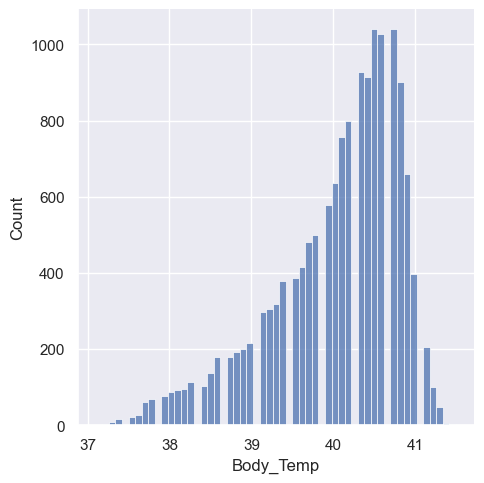

In [31]:
plt.figure(figsize=(6,6))
plt.title('Body_Temp')
sns.displot(df['Body_Temp'])
plt.show()

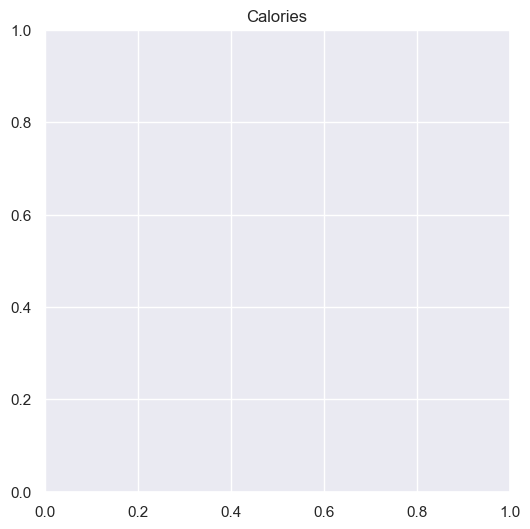

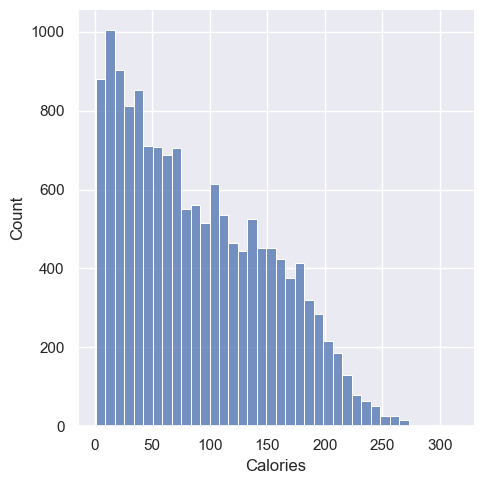

In [32]:
plt.figure(figsize=(6,6))
plt.title('Calories')
sns.displot(df['Calories'])
plt.show()

<Axes: >

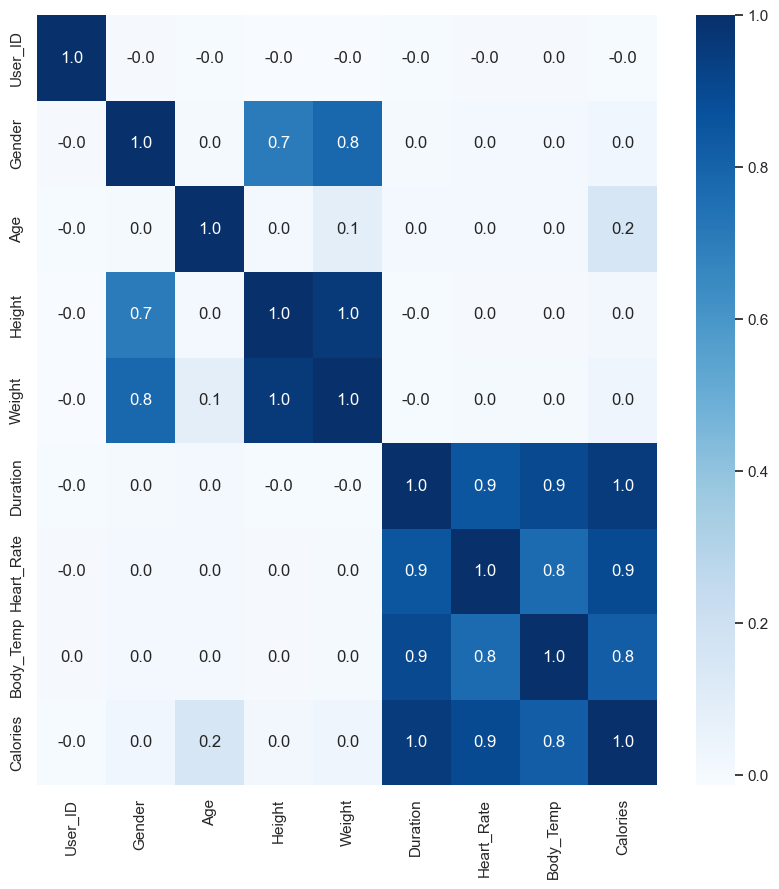

In [39]:
#constructinh heatmap to understand correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True , fmt = '.1f' , annot=True , cmap='Blues')

In [33]:
x=df.drop(['Calories'],axis=1)
y=df['Calories']

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [35]:
regressor = XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
y_pred = regressor.predict(x_test)

In [41]:
y_train_pred = regressor.predict(x_train)

In [37]:
print(r2_score(y_pred=y_pred, y_true=y_test))

0.9987901041693489


In [42]:
print(r2_score(y_train_pred,y_train))

0.9995586723186757


In [43]:
input_data = (14733363,1,68,190.0,94.0,29.0,105.0,40.8)

input_data_numpy = np.asarray(input_data)
input_data_reshape = input_data_numpy.reshape(1,-1)
pred = regressor.predict(input_data_reshape)
print('The Calories lost is ',pred[0])


The Calories lost is  233.62018
